In [82]:
# Calculating and plotting DOS from TB Electronic dispersion

import numpy as np
import matplotlib.pyplot as plt

## construct k-points array ##################3
K = []
nm = 2**6                        ###larger the kspace the smaller the broadening, eps that enters the delta fucn
mstep = 1/nm
for l in np.arange(0,nm+1):
    for m in np.arange(0,nm+1):
        for n in np.arange(0,nm+1):
            kx = mstep*l
            ky = mstep*m
            kz = mstep*n
          
            k = [kx,ky,kz]
            K.append(k)
            
k_points = np.array(K)
a        = 1
k        = a*2*np.pi*k_points/2
##########################################################################


### Alternatively, the k-points can also be read from a file oganised in three columns x, y, and z respectively. 
#This is done in the next line:

#k_points = np.loadtxt("file_path_to_kpoints",  dtype = float, usecols = (0,1,2))





############################ define the TB function  #####################################

def E_tb(k):
    t = 1
    e0 =  0.0
   
    band_array = []
  

    for i in np.arange(0,np.size(k[:,0])):
    
        band  = e0 - 4*t*(np.cos(k[i,0])*np.cos(k[i,1]) + \
                   np.cos(k[i,0])*np.cos(k[i,2]) + np.cos(k[i,1])*np.cos(k[i,2]))  ### TB for fcc crystal
        
        band  = e0 - 2*t*(np.cos(k[i,0]) + np.cos(k[i,1]) + np.cos(k[i,2]))  ### TB for SC crystal
        
        band  = e0 - 8*t*((np.cos(k[i,0])/2)*(np.cos(k[i,1])/2)*(np.cos(k[i,2])/2))  ### TB for bcc crystal
            

        band_array.append(band)
        
    eig_energies = band_array
    return eig_energies

##### end of TB function definintion #######################################







######### E_dispersion for plotting



### Alternatively, the energy eigen values can also be read from a file in a single column
#This is done in the next line:
#Eband = np.loadtxt("path_to_energyvalues_ file", dtype = float, usecols = (0))


def delta_lz(x):             #### Lorentzian distribution, approx. to delta function
    Lortz = (1/np.pi)*(eps / (x**2 + eps**2))
    return Lortz

def delta_g(x):              #### Gaussian distribution, approx. to delta function
    prefactor = (1/np.sqrt(2*np.pi))
    Gausn = prefactor*(np.exp(-x**2/2*eps**2))
    return Gausn
    
def delta_mv(x):             #### Marzari-Vanderbilt distribution, approx. to delta function
    xp = x / eps
    #xp = x
    arg = (xp - 1/np.sqrt(2))**2
    sqrt1dpi = 1/np.sqrt(np.pi)
    mv  = sqrt1dpi*np.exp(-arg)*(2 - np.sqrt(2)*xp)
    return mv
    
def N(E):                   ###### definintion of DOS 
    D = np.sum([delta_lz(E - Ek)])
    DOS = (1 / N_st)*D
    return DOS

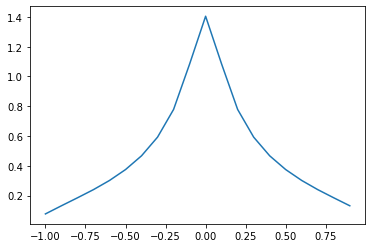

In [83]:

### Calculating DOS 

Ek = E_tb(k)

N_st = (nm)**(3)   ##### normalization factor

eps  = 0.08        ### Broadening parameter for delta function
Emin = np.min(Ek)
Emax = np.max(Ek)
dE   = 0.1       ### Energy step

DOS_array = [] 
EDOS_array = []

for En in np.arange(Emin,Emax,dE):
    dos = N(En)
    DOS_array.append(dos)
    EDOS_array.append(En)
    
plt.plot(EDOS_array,DOS_array)  ## plot dos
plt.show()